https://www.geeksforgeeks.org/ml-kaggle-breast-cancer-wisconsin-diagnosis-using-knn/

In [26]:
# performing linear algebra
import numpy as np

# data processing
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [27]:
df = pd.read_csv("/content/data.csv")

print (df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [29]:
df.drop(['Unnamed: 32', 'id'], axis = 1)
print(df.shape)


(569, 33)


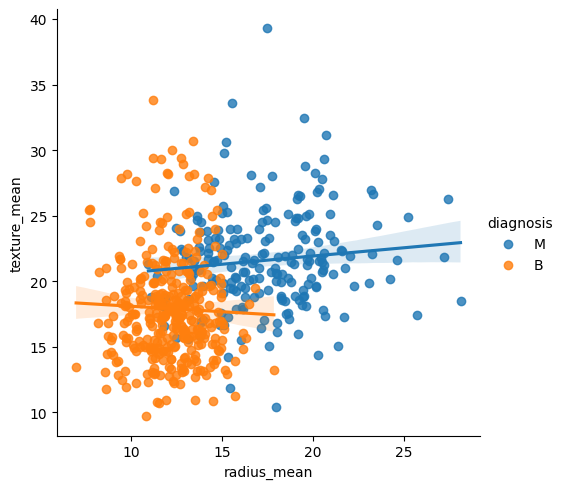

In [30]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

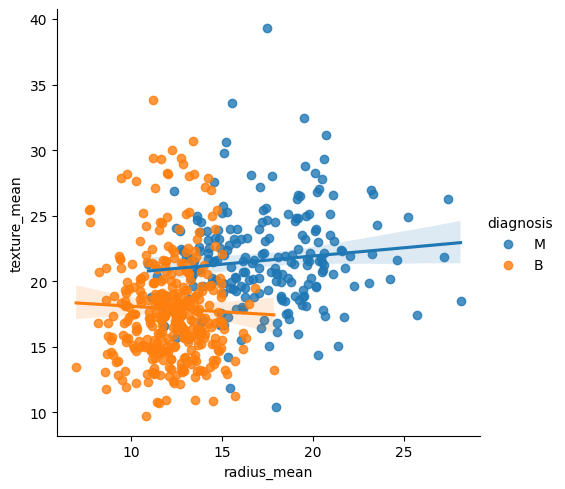

In [31]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)


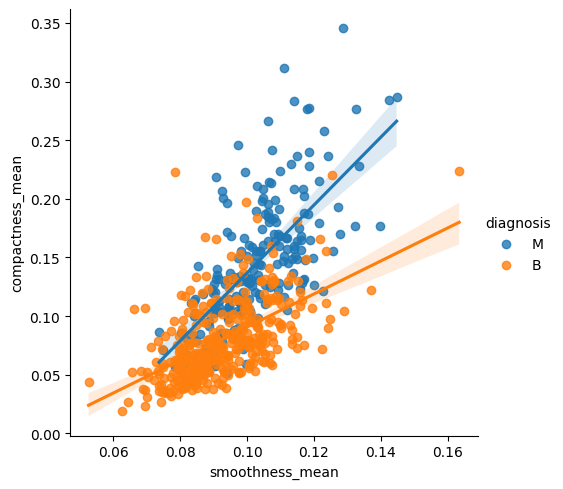

In [32]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',
		data = df, hue = 'diagnosis')


In [33]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size = 0.33, random_state = 42)


In [35]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [36]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [39]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [40]:
y_pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.71


In [42]:
# Load a dataset (replace with your data)
data = load_iris()
X, y = data.data, data.target

# Introduce NaN values randomly for demonstration (you can skip this step)
np.random.seed(0)
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Step 2: Use KNeighborsClassifier (or any classifier) after imputation
knn = KNeighborsClassifier()

# Create a pipeline that imputes missing values and then applies KNN
pipeline = make_pipeline(imputer, knn)

# Fit the model on training data
pipeline.fit(X_train, y_train)

# Score the model on the test data
score_knn = pipeline.score(X_test, y_test)
print(f"KNN Score after Imputation: {score_knn:.4f}")

# Step 3: Optionally drop any remaining rows with NaN values in the test set
# Use a mask to find rows with NaNs and then index the arrays
nan_mask = np.isnan(X_test).any(axis=1)
X_test_dropped = X_test[~nan_mask]
y_test_dropped = y_test[~nan_mask]

# Check if any rows remain after dropping NaNs
if X_test_dropped.size > 0:
    score_knn_dropped = pipeline.score(X_test_dropped, y_test_dropped)
    print(f"KNN Score after Dropping NaNs: {score_knn_dropped:.4f}")
else:
    print("No rows left after dropping NaNs.")

# Step 4: Use an estimator that can handle NaNs if necessary
hgb = HistGradientBoostingClassifier()

# Fit the model
hgb.fit(X_train, y_train)

# Score the model
score_hgb = hgb.score(X_test, y_test)
print(f"HistGradientBoostingClassifier Score: {score_hgb:.4f}")

KNN Score after Imputation: 0.9000
KNN Score after Dropping NaNs: 1.0000
HistGradientBoostingClassifier Score: 0.8667


In [44]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values (NaN) with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and validation sets
X_train_imputed = imputer.fit_transform(X_train)

# Perform 10-fold cross-validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)

    # Use cross_val_score with the imputed training data
    scores = cross_val_score(
        knn, X_train_imputed, y_train, cv=10, scoring='accuracy'
    )
    cv_scores.append(scores.mean())

The optimal number of neighbors is  3 


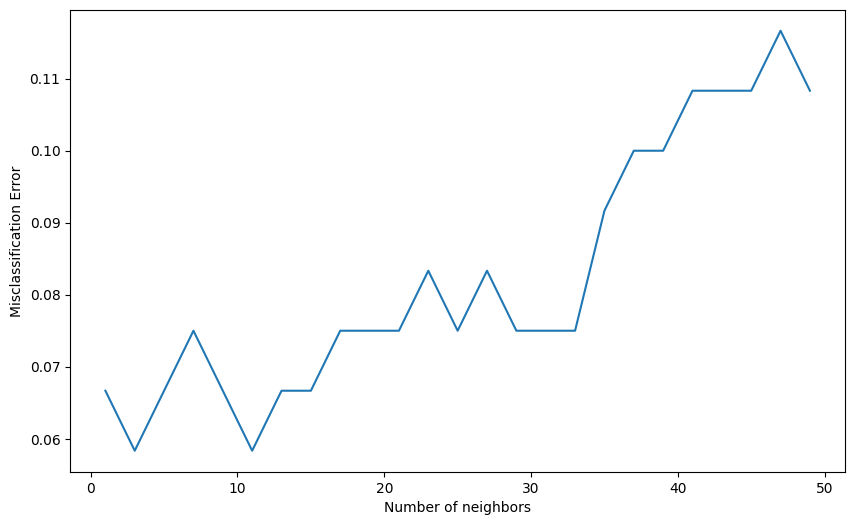

In [45]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()
